# Analysing the impact of weather on taxi demand

The weather data do not need much preprocessing or feature engineering. They can be imported directly as a dataframe and merge with the processed data of daily taxi demand.  

Be aware that al weather data are from one single station - **NY CITY CENTRAL PARK**. For simplicity for the project, we assume that weather wouldn't vary dramatically across different locations in NY city. 

The details of the attributes in weather datafiles can be found here: https://docs.opendata.aws/noaa-ghcn-pds/readme.html

**Summary below :**
- PRCP = Precipitation (tenths of mm)
- SNOW = Snowfall (mm)
- TMAX = Maximum temperature (degree celsius)
- TMIN = Minimum temperature (degree celsius)

In [1]:
# Imports
import numpy as np
import pandas as pd
import glob
import datetime
import os
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Step 1: Import data

In [2]:
# import 2019 weather data
path = "../raw_data/weather"
all_19 = glob.glob(os.path.join(path,"weather_2019-*.csv"))
weather_19 = pd.concat((pd.read_csv(f, parse_dates=[1]) for f in all_19), ignore_index=True).drop("STATION", axis=1)
weather_19["DATE"] = pd.to_datetime(weather_19["DATE"])

In [3]:
weather_19.dtypes

DATE    datetime64[ns]
PRCP           float64
SNOW           float64
TMAX           float64
TMIN           float64
dtype: object

In [4]:
# get the medium temperture by taking the average of temperature max and temperature min
weather_19["TMED"] = (weather_19["TMAX"] + weather_19["TMIN"]) /2
weather_19

,DATE,PRCP,SNOW,TMAX,TMIN,TMED
0,2019-01-01,1.5,0.0,14.4,3.9,9.15
1,2019-01-02,0.0,0.0,4.4,1.7,3.05
2,2019-01-03,0.0,0.0,6.7,2.8,4.75
3,2019-01-04,0.0,0.0,8.3,1.7,5.00
4,2019-01-05,12.7,0.0,8.3,5.0,6.65
...,...,...,...,...,...,...
360,2019-12-27,0.0,0.0,12.2,7.8,10.00
361,2019-12-28,0.0,0.0,10.6,6.1,8.35
362,2019-12-29,6.4,0.0,6.7,3.9,5.30
363,2019-12-30,18.8,0.0,5.0,2.8,3.90


In [5]:
weather_19.describe()

,PRCP,SNOW,TMAX,TMIN,TMED
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,3.692603,1.158904,17.033973,9.332329,13.183151
std,8.036737,8.014544,10.125775,9.275618,9.605420
min,0.000000,0.000000,-9.900000,-16.600000,-12.700000
25%,0.000000,0.000000,8.300000,1.700000,5.000000
50%,0.000000,0.000000,17.800000,10.600000,13.900000
75%,2.000000,0.000000,26.100000,17.200000,21.650000
max,46.500000,102.000000,35.000000,27.800000,31.400000


In [6]:
# import 2020 weather data
path = "../raw_data/weather"
all_20 = glob.glob(os.path.join(path,"weather_2020-*.csv"))
weather_20 = pd.concat((pd.read_csv(f, parse_dates=[1]) for f in all_20), ignore_index=True).drop("STATION", axis=1)
weather_20["DATE"] = pd.to_datetime(weather_20["DATE"])

In [7]:
# get the medium temperture by taking the average of temperature max and temperature min
weather_20["TMED"] = (weather_20["TMAX"] + weather_20["TMIN"]) /2
weather_20

,DATE,PRCP,SNOW,TMAX,TMIN,TMED
0,2020-01-01,0.0,0.0,5.0,1.1,3.05
1,2020-01-02,0.0,0.0,9.4,0.6,5.00
2,2020-01-03,3.8,0.0,9.4,6.7,8.05
3,2020-01-04,6.9,0.0,10.6,5.0,7.80
4,2020-01-05,0.0,0.0,5.6,1.7,3.65
...,...,...,...,...,...,...
360,2020-12-27,0.0,0.0,2.8,-4.3,-0.75
361,2020-12-28,0.0,0.0,10.0,1.7,5.85
362,2020-12-29,0.0,0.0,6.1,-1.0,2.55
363,2020-12-30,0.0,0.0,6.1,-2.1,2.00


In [8]:
weather_20.describe()

,PRCP,SNOW,TMAX,TMIN,TMED
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,3.158356,0.890411,17.989863,10.240274,14.115068
std,7.844237,10.505574,9.106113,8.441541,8.665947
min,0.000000,0.000000,-0.500000,-9.900000,-5.200000
25%,0.000000,0.000000,10.000000,3.300000,7.200000
50%,0.000000,0.000000,18.300000,9.400000,13.600000
75%,1.500000,0.000000,26.100000,18.300000,21.950000
max,64.500000,165.000000,35.600000,27.200000,30.550000


In [9]:
# Import taxi data
daily_19 = pd.read_csv("../processed_data/daily_summary_2019.csv").iloc[: , 1:]
daily_20 = pd.read_csv("../processed_data/daily_summary_2020.csv").iloc[: , 1:]
daily_19.sort_values(by = ['pickup_date'],inplace = True, ignore_index=True)
daily_19['pickup_date'] = pd.to_datetime(daily_19['pickup_date'])
daily_20['pickup_date'] = pd.to_datetime(daily_20['pickup_date'])
daily_19

,pickup_date,trip_count_k,Average_Trip_Amount_USD,Average_Distance_in_Miles,Average_passenger_count
0,2019-01-01,181.31,16.574572,3.525538,1.714654
1,2019-01-02,189.53,16.203024,3.209825,1.630345
2,2019-01-03,213.60,15.612282,2.964163,1.602053
3,2019-01-04,225.13,15.114090,2.816055,1.614530
4,2019-01-05,227.22,14.035890,2.661787,1.677065
...,...,...,...,...,...
360,2019-12-27,161.21,19.152544,3.153261,1.670726
361,2019-12-28,164.34,18.982715,3.191547,1.711519
362,2019-12-29,157.15,19.167553,3.357803,1.691443
363,2019-12-30,165.96,18.592396,3.025486,1.618993


## Step 2: Merge dataframe

In [10]:
taxi_19 = pd.merge(daily_19, weather_19, left_on="pickup_date", right_on="DATE").drop(["DATE"], axis=1)

In [11]:
taxi_19

,pickup_date,trip_count_k,Average_Trip_Amount_USD,Average_Distance_in_Miles,Average_passenger_count,PRCP,SNOW,TMAX,TMIN,TMED
0,2019-01-01,181.31,16.574572,3.525538,1.714654,1.5,0.0,14.4,3.9,9.15
1,2019-01-02,189.53,16.203024,3.209825,1.630345,0.0,0.0,4.4,1.7,3.05
2,2019-01-03,213.60,15.612282,2.964163,1.602053,0.0,0.0,6.7,2.8,4.75
3,2019-01-04,225.13,15.114090,2.816055,1.614530,0.0,0.0,8.3,1.7,5.00
4,2019-01-05,227.22,14.035890,2.661787,1.677065,12.7,0.0,8.3,5.0,6.65
...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,161.21,19.152544,3.153261,1.670726,0.0,0.0,12.2,7.8,10.00
361,2019-12-28,164.34,18.982715,3.191547,1.711519,0.0,0.0,10.6,6.1,8.35
362,2019-12-29,157.15,19.167553,3.357803,1.691443,6.4,0.0,6.7,3.9,5.30
363,2019-12-30,165.96,18.592396,3.025486,1.618993,18.8,0.0,5.0,2.8,3.90


In [12]:
taxi_20 = pd.merge(daily_20, weather_20, left_on="pickup_date", right_on="DATE").drop(["DATE"], axis=1)

In [13]:
taxi_20

,pickup_date,trip_count_k,Average_Trip_Amount_USD,Average_Distance_in_Miles,Average_passenger_count,PRCP,SNOW,TMAX,TMIN,TMED
0,2020-01-01,161.87,19.234755,3.470320,1.700407,0.0,0.0,5.0,1.1,3.05
1,2020-01-02,153.89,18.985798,3.235164,1.611065,0.0,0.0,9.4,0.6,5.00
2,2020-01-03,174.74,18.092626,2.926166,1.601062,3.8,0.0,9.4,6.7,8.05
3,2020-01-04,175.22,17.587971,2.917274,1.657967,6.9,0.0,10.6,5.0,7.80
4,2020-01-05,156.58,18.547160,3.273550,1.616082,0.0,0.0,5.6,1.7,3.65
...,...,...,...,...,...,...,...,...,...,...
360,2020-12-27,22.82,18.100744,3.317965,1.512663,0.0,0.0,2.8,-4.3,-0.75
361,2020-12-28,35.69,16.914437,2.769158,1.472390,0.0,0.0,10.0,1.7,5.85
362,2020-12-29,40.19,16.431964,2.569532,1.460088,0.0,0.0,6.1,-1.0,2.55
363,2020-12-30,41.67,16.687008,2.616083,1.469162,0.0,0.0,6.1,-2.1,2.00


## Step 3: How does maximum temperture affect taxi demand?

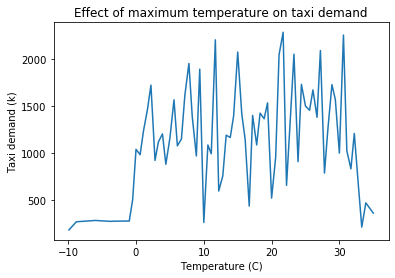

In [14]:
max_temp_19 = taxi_19.groupby('TMAX')['trip_count_k'].sum().to_frame()
plt.plot(max_temp_19.index, max_temp_19)
plt.xlabel('Temperature (C)')
plt.ylabel('Taxi demand (k)')
plt.title('Effect of maximum temperature on taxi demand')
plt.savefig('../plots/Effect_of_max_temperature_on_taxi_demand_19.png')
plt.show()

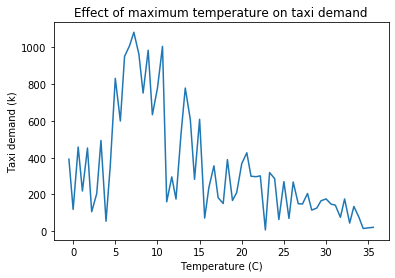

In [15]:
max_temp_20 = taxi_20.groupby('TMAX')['trip_count_k'].sum().to_frame()
plt.plot(max_temp_20.index, max_temp_20)
plt.xlabel('Temperature (C)')
plt.ylabel('Taxi demand (k)')
plt.title('Effect of maximum temperature on taxi demand')
plt.savefig('../plots/Effect_of_max_temperature_on_taxi_demand_20.png')
plt.show()

## Step 4: How does average temperture affect taxi demand?

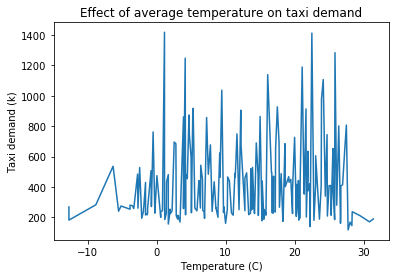

In [16]:
max_temp_19 = taxi_19.groupby('TMED')['trip_count_k'].sum().to_frame()
plt.plot(max_temp_19.index, max_temp_19)
plt.xlabel('Temperature (C)')
plt.ylabel('Taxi demand (k)')
plt.title('Effect of average temperature on taxi demand')
plt.savefig('../plots/Effect_of_avg_temperature_on_taxi_demand_19.png')
plt.show()

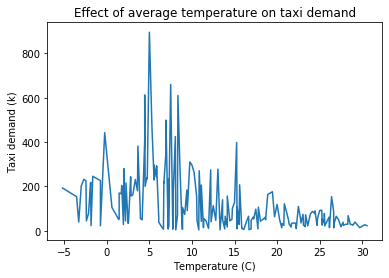

In [17]:
max_temp_20 = taxi_20.groupby('TMED')['trip_count_k'].sum().to_frame()
plt.plot(max_temp_20.index, max_temp_20)
plt.xlabel('Temperature (C)')
plt.ylabel('Taxi demand (k)')
plt.title('Effect of average temperature on taxi demand')
plt.savefig('../plots/Effect_of_avg_temperature_on_taxi_demand_20.png')
plt.show()

## Step 5: How does precipitation or snowfall affect taxi demand?

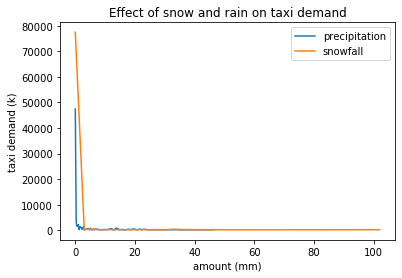

In [18]:
precipitation = taxi_19.groupby('PRCP')['trip_count_k'].sum().to_frame()

snowfall = taxi_19.groupby('SNOW')['trip_count_k'].sum().to_frame()

plt.plot(precipitation.index, precipitation, label = 'precipitation')
plt.plot(snowfall.index, snowfall, label = 'snowfall')
plt.xlabel('amount (mm)')
plt.ylabel('taxi demand (k)')
plt.title('Effect of snow and rain on taxi demand')
plt.legend()
plt.savefig('../plots/Effect_of_rain_or_snow_on_taxi_demand_19.png')
plt.show()

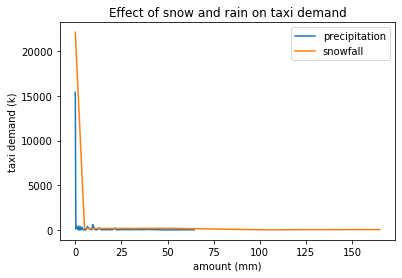

In [19]:
precipitation = taxi_20.groupby('PRCP')['trip_count_k'].sum().to_frame()

snowfall = taxi_20.groupby('SNOW')['trip_count_k'].sum().to_frame()

plt.plot(precipitation.index, precipitation, label = 'precipitation')
plt.plot(snowfall.index, snowfall, label = 'snowfall')
plt.xlabel('amount (mm)')
plt.ylabel('taxi demand (k)')
plt.title('Effect of snow and rain on taxi demand')
plt.legend()
plt.savefig('../plots/Effect_of_rain_or_snow_on_taxi_demand_20.png')
plt.show()